<a href="https://colab.research.google.com/github/bbcndoro/bigData/blob/kris/pySparkTugasManipulasidata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset berhasil dimuat!
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wo

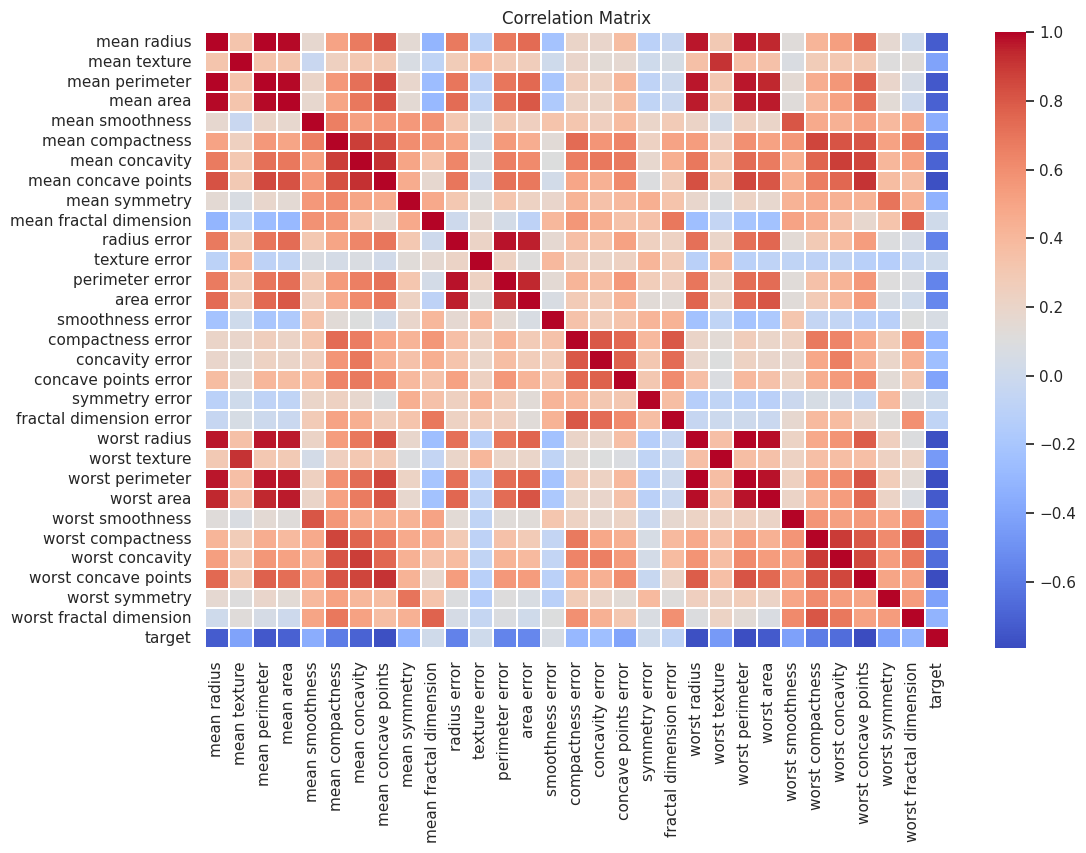


Model training selesai!

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



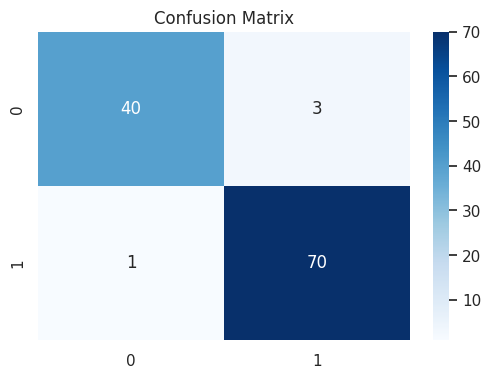

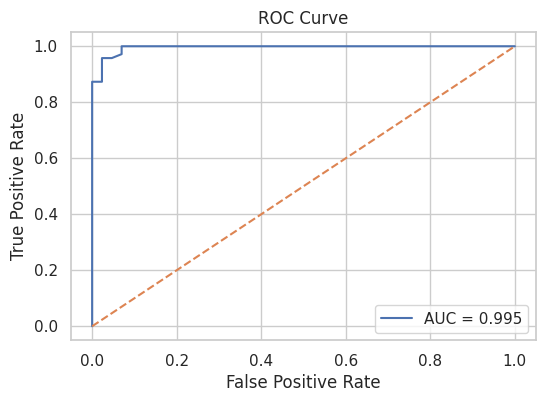

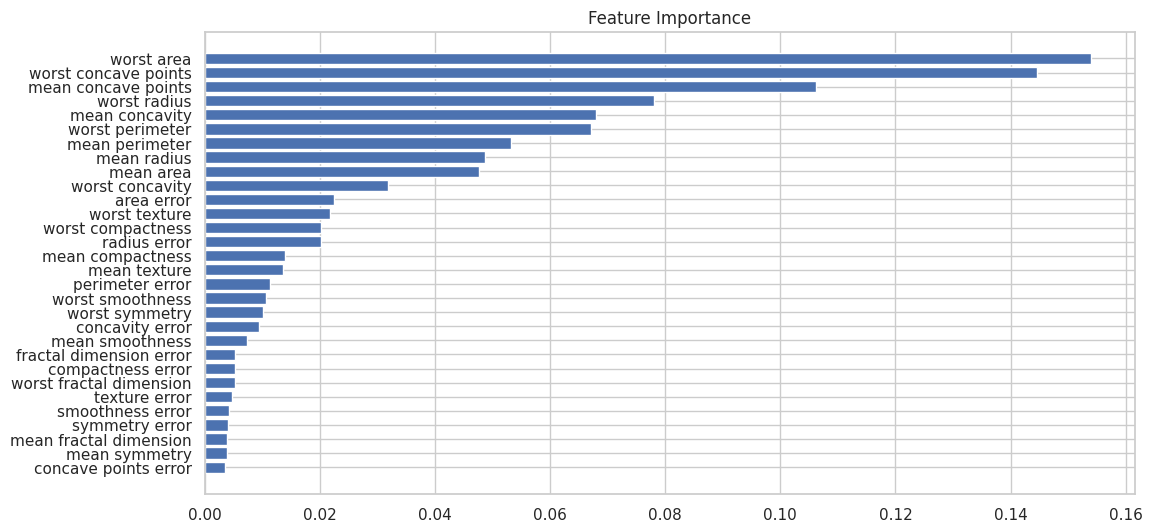


Model disimpan sebagai: breast_cancer_model.pkl


In [8]:
# ============================================================
# 1. Import Library
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

import joblib   # untuk simpan model


# ============================================================
# 2. Load Dataset dari sklearn (UCI Breast Cancer)
# ============================================================
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

print("\nDataset berhasil dimuat!")
print(df.head())


# ============================================================
# 3. Exploratory Data Analysis
# ============================================================

print("\nInformasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

# Cek missing value
print("\nMissing Values:")
print(df.isnull().sum())


# ============================================================
# 4. Correlation Matrix Visualization
# ============================================================
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Matrix")
plt.show()


# ============================================================
# 5. Split Dataset
# ============================================================
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ============================================================
# 6. Train Model (Random Forest)
# ============================================================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("\nModel training selesai!")


# ============================================================
# 7. Evaluation
# ============================================================
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# ============================================================
# 8. ROC Curve
# ============================================================
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# ============================================================
# 9. Feature Importance
# ============================================================
importances = model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(12,6))
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), X.columns[sorted_idx])
plt.title("Feature Importance")
plt.show()


# ============================================================
# 10. Save Model
# ============================================================
joblib.dump(model, "breast_cancer_model.pkl")
print("\nModel disimpan sebagai: breast_cancer_model.pkl")


SparkSession berhasil dibuat!
+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+------+
|mean radius|mean texture|mean perimeter|mean area|mean smoothness|mean compactness|mean concavity|mean concave points|mean symmetry|mean fractal dimension|radius error|texture error|perimeter error|area error|smoothness error|compactness error|concavity error|concave points error|symmetry error|fractal dimension error|worst radius|worst texture|worst perimeter|worst area|worst smoothness|worst compactness|worst concavity|worst concave points|worst symmetry|worst fractal 

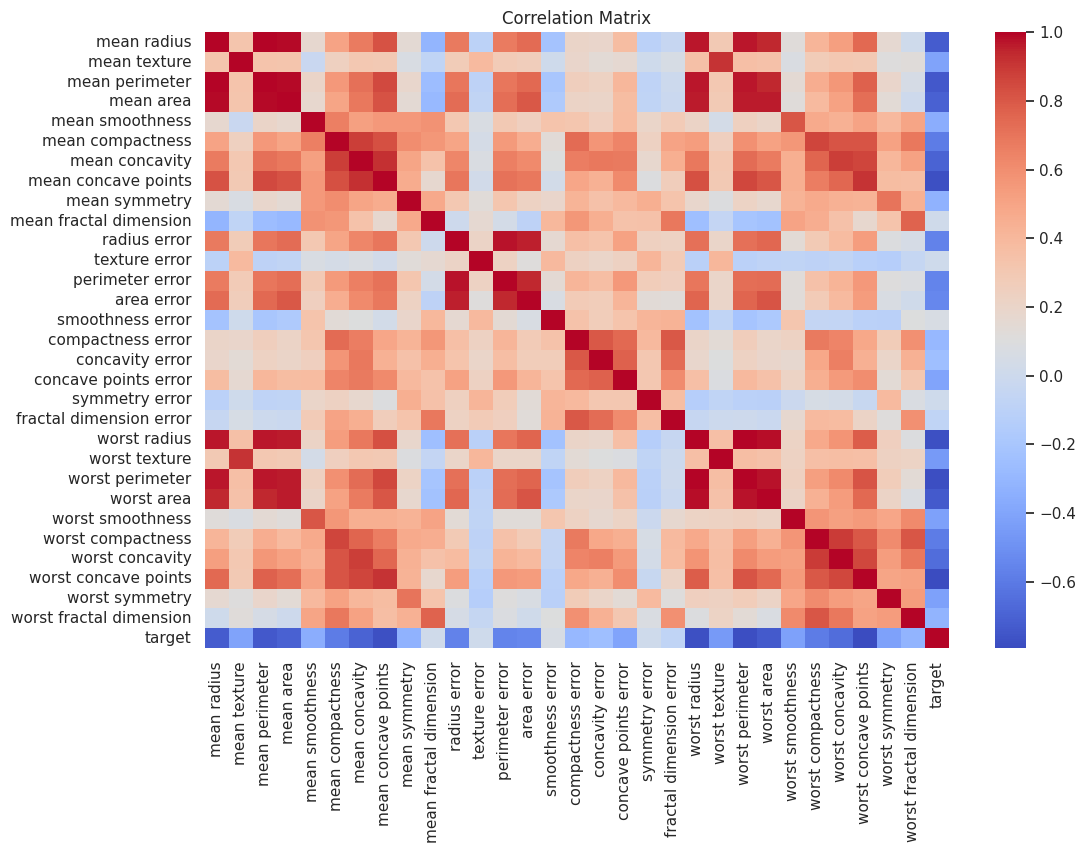


Model berhasil dilatih!
+------+----------+--------------------+
|target|prediction|         probability|
+------+----------+--------------------+
|     1|       1.0|[0.07525779893060...|
|     1|       1.0|[0.01831858339843...|
|     1|       1.0|[0.01947837438723...|
|     1|       1.0|[0.00824304139301...|
|     1|       1.0|[0.00757008858135...|
|     1|       1.0|[0.00823068454806...|
|     1|       1.0|[0.00794643674448...|
|     1|       1.0|[0.00795776974078...|
|     1|       1.0|[0.01443355623777...|
|     1|       1.0|[0.02357529894453...|
+------+----------+--------------------+
only showing top 10 rows


Accuracy: 0.9684
AUC Score: 0.9969


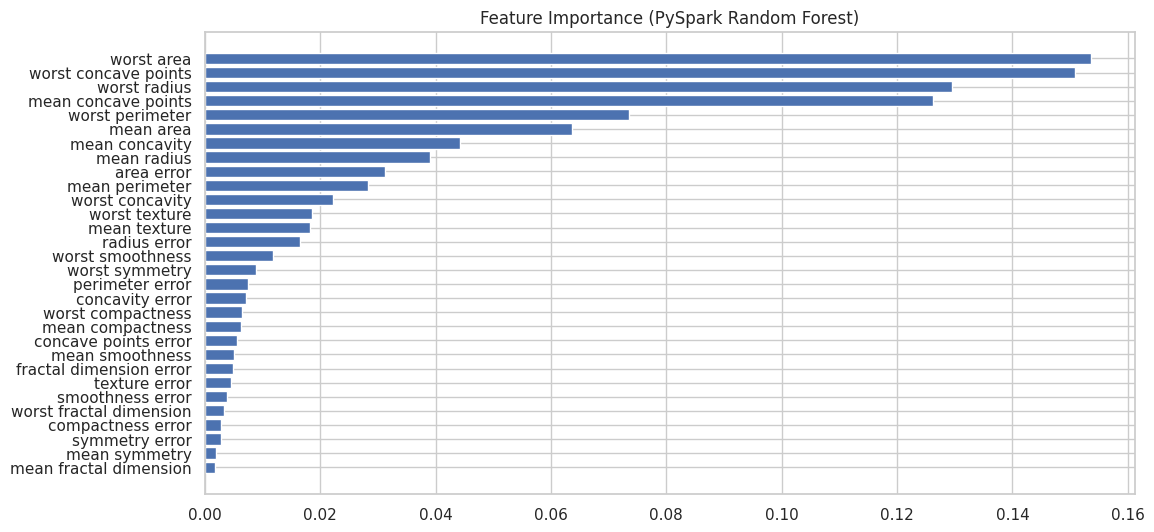


Model berhasil disimpan sebagai: spark_breast_cancer_model


In [9]:
# ============================================================
# 1. Import Library
# ============================================================
import pandas as pd
from sklearn.datasets import load_breast_cancer

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# ============================================================
# 2. Inisialisasi Spark
# ============================================================
spark = (
    SparkSession.builder
    .appName("BreastCancerSparkML")
    .master("local[*]")
    .getOrCreate()
)

print("SparkSession berhasil dibuat!")


# ============================================================
# 3. Load Dataset dari sklearn lalu ubah ke Spark
# ============================================================
data = load_breast_cancer()
df_pd = pd.DataFrame(data.data, columns=data.feature_names)
df_pd["target"] = data.target

df_spark = spark.createDataFrame(df_pd)
df_spark.show(5)


# ============================================================
# 4. EDA Menggunakan Spark
# ============================================================
print("\nSchema:")
df_spark.printSchema()

print("\nJumlah Baris:", df_spark.count())

print("\nDeskripsi Statistik:")
df_spark.describe().show()


# ============================================================
# 5. Visualisasi Korelasi (Convert ke Pandas)
# ============================================================
plt.figure(figsize=(12, 8))
sns.heatmap(df_pd.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# ============================================================
# 6. Feature Vectorization & Scaling
# ============================================================
features = data.feature_names.tolist()

assembler = VectorAssembler(
    inputCols=features,
    outputCol="features"
)

scaler = StandardScaler(
    inputCol="features",
    outputCol="scaledFeatures"
)


# ============================================================
# 7. Train-Test Split
# ============================================================
train_df, test_df = df_spark.randomSplit([0.8, 0.2], seed=42)


# ============================================================
# 8. Train Model Spark Random Forest
# ============================================================
rf = RandomForestClassifier(
    featuresCol="scaledFeatures",
    labelCol="target",
    numTrees=100
)

pipeline = Pipeline(stages=[assembler, scaler, rf])

model = pipeline.fit(train_df)
print("\nModel berhasil dilatih!")


# ============================================================
# 9. Evaluasi Model
# ============================================================
predictions = model.transform(test_df)
predictions.select("target", "prediction", "probability").show(10)

# Accuracy
acc_eval = MulticlassClassificationEvaluator(
    labelCol="target", predictionCol="prediction", metricName="accuracy"
)
accuracy = acc_eval.evaluate(predictions)

print(f"\nAccuracy: {accuracy:.4f}")

# ROC AUC
roc_eval = BinaryClassificationEvaluator(
    labelCol="target", rawPredictionCol="probability", metricName="areaUnderROC"
)
roc_auc = roc_eval.evaluate(predictions)

print(f"AUC Score: {roc_auc:.4f}")


# ============================================================
# 10. Feature Importance Visualization
# ============================================================
rf_model = model.stages[-1]
importances = rf_model.featureImportances.toArray()

sorted_idx = importances.argsort()
plt.figure(figsize=(12, 6))
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), [features[i] for i in sorted_idx])
plt.title("Feature Importance (PySpark Random Forest)")
plt.show()


# ============================================================
# 11. Save Model
# ============================================================
model.write().overwrite().save("spark_breast_cancer_model")
print("\nModel berhasil disimpan sebagai: spark_breast_cancer_model")
